### Import Main Libraries

In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Machine Learning Moduel

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree,metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from IPython.display import SVG
from sklearn.naive_bayes import GaussianNB
from imblearn.combine import SMOTEENN
from xgboost import XGBClassifier

### Metrices

In [3]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

In [4]:
data = pd.read_csv('default of credit card clients.csv')

In [5]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and ***his/her family (supplementary) credit***.

- X2: Gender (1 = male; 2 = female).

- X3: Education (1 = graduate school(Master or Doctor degree's); 2 = university; 3 = high school; 4 = others).

- X4: Marital status (1 = married; 2 = single; 3 = others(Outlayers | Gays)).

- X5: Age (year).

- X6–X11:(Pay_1 --> Pay_6) History of past payment. We tracked the past monthly payment recordsfrom April to September, 2005 as follows:
    - *X6 = the repayment status in September, 2005, X7 = the repayment status in August, 2005 ,X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: 1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; ...; 8 = payment delay for eight months; 9 = payment delay for nine months and above.* 

- X12–X17: Amount of bill statement (NT dollar).
    - *X12 = amount of bill statement in September 2005, X13 = amount of bill statement in August 2005, X17 = amount of bill statement in April 2005.*

- X18–X23: Amount of previous payment (NT dollar).
    - *X18 = amount paid in September 2005, X19 = amount paid in August 2005, X23 = amount paid in April 2005.*


# Analysis The Data

#### Drop ID column because it's for indexing purposes only

In [6]:
data.drop(['ID'] ,axis= 1 , inplace = True)

In [7]:
data.nunique()

LIMIT_BAL       81
SEX              2
EDUCATION        7
MARRIAGE         4
AGE             56
PAY_1           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5           10
PAY_6           10
BILL_AMT1    22723
BILL_AMT2    22346
BILL_AMT3    22026
BILL_AMT4    21548
BILL_AMT5    21010
BILL_AMT6    20604
PAY_AMT1      7943
PAY_AMT2      7899
PAY_AMT3      7518
PAY_AMT4      6937
PAY_AMT5      6897
PAY_AMT6      6939
dpnm             2
dtype: int64

In [8]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'dpnm'],
      dtype='object')

In [10]:
data[['LIMIT_BAL','PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'dpnm']].describe()

,LIMIT_BAL,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [12]:
data['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

#### There were three problems at the three columns

- Education Column contain missing values [0,5,6], it is replaced by [1,2,3] 

In [13]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [14]:
data['EDUCATION'].replace(5,2,inplace = True)
data['EDUCATION'].replace(6,3,inplace = True)
data['EDUCATION'].replace(0,2,inplace = True)

In [15]:
data['EDUCATION'].value_counts()

2    14324
1    10585
3     4968
4      123
Name: EDUCATION, dtype: int64


---



- Marriage Column contain missing value [0], it is replaced by [2]

In [16]:
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [17]:
data['MARRIAGE'].replace(0,2,inplace = True)

In [18]:
data['MARRIAGE'].value_counts()

2    16018
1    13659
3      323
Name: MARRIAGE, dtype: int64

---

- The third problem at the last columun as it contains unbalanced values, it will be solved at the data moduling 
---  

In [19]:
data['dpnm'].value_counts()

0    23364
1     6636
Name: dpnm, dtype: int64

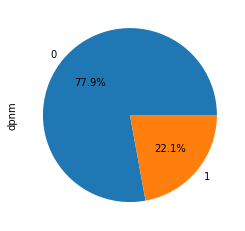

In [20]:
round(data['dpnm'].value_counts()[[0,1]], 2).plot.pie(autopct= '%1.1f%%')

---

- Detectign and Removing duplicated values

In [21]:
data.duplicated().value_counts()

False    29964
True        36
dtype: int64

In [22]:
data = data.drop_duplicates()

#### Define a 3 columns :
    1)- the first column is a sum of  PAY_1 --> PAY_6
    2)- the second column is a sum of  BILL_AMT_1 --> BILL_AMT_6
    3)- the third column is a sum of  PAY_AMT_1 --> PAY_AMT_6



     


In [23]:
data['PAY'] = data[[ 'PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].sum(axis = 1)
data.drop(['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'],axis = 1,inplace = True)

In [24]:
data['BILL_AMT'] = data[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].abs().sum(axis = 1)
data.drop(['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'],axis = 1,inplace = True)

In [25]:
data['PAY_AMT'] = data[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis = 1)
data.drop(['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],axis = 1,inplace = True)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29964 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  29964 non-null  int64
 1   SEX        29964 non-null  int64
 2   EDUCATION  29964 non-null  int64
 3   MARRIAGE   29964 non-null  int64
 4   AGE        29964 non-null  int64
 5   dpnm       29964 non-null  int64
 6   PAY        29964 non-null  int64
 7   BILL_AMT   29964 non-null  int64
 8   PAY_AMT    29964 non-null  int64
dtypes: int64(9)
memory usage: 2.3 MB


In [27]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,dpnm,PAY,BILL_AMT,PAY_AMT
count,29964.000000,29964.000000,29964.000000,29964.000000,29964.000000,29964.000000,29964.000000,2.996400e+04,2.996400e+04
mean,167445.924443,1.603758,1.821419,1.555467,35.488286,0.221266,-1.085603,2.706357e+05,3.168884e+04
std,129760.526760,0.489124,0.709084,0.518162,9.219450,0.415106,5.888130,3.795850e+05,6.085458e+04
min,10000.000000,1.000000,1.000000,1.000000,21.000000,0.000000,-12.000000,0.000000e+00,0.000000e+00
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,-5.000000,2.966350e+04,6.700000e+03
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,1.269175e+05,1.440000e+04
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,3.431485e+05,3.360000e+04
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,1.000000,36.000000,5.263883e+06,3.764066e+06


---
### Data Visualization


In [28]:
data.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,dpnm,PAY,BILL_AMT,PAY_AMT
LIMIT_BAL,1.000000,0.024978,-0.242657,-0.110707,0.144617,-0.153890,-0.316964,0.303051,0.353039
SEX,0.024978,1.000000,0.012193,-0.029622,-0.091103,-0.039765,-0.069881,-0.026285,-0.004903
EDUCATION,-0.242657,0.012193,1.000000,-0.145036,0.188605,0.046601,0.145186,-0.007319,-0.079771
MARRIAGE,-0.110707,-0.029622,-0.145036,1.000000,-0.415193,-0.026338,0.034936,-0.027592,-0.012428
AGE,0.144617,-0.091103,0.188605,-0.415193,1.000000,0.013601,-0.058574,0.054937,0.040642
dpnm,-0.153890,-0.039765,0.046601,-0.026338,0.013601,1.000000,0.281975,-0.012777,-0.102498
PAY,-0.316964,-0.069881,0.145186,0.034936,-0.058574,0.281975,1.000000,0.281012,-0.075356
BILL_AMT,0.303051,-0.026285,-0.007319,-0.027592,0.054937,-0.012777,0.281012,1.000000,0.345953
PAY_AMT,0.353039,-0.004903,-0.079771,-0.012428,0.040642,-0.102498,-0.075356,0.345953,1.000000


<Figure size 3024x2880 with 0 Axes>

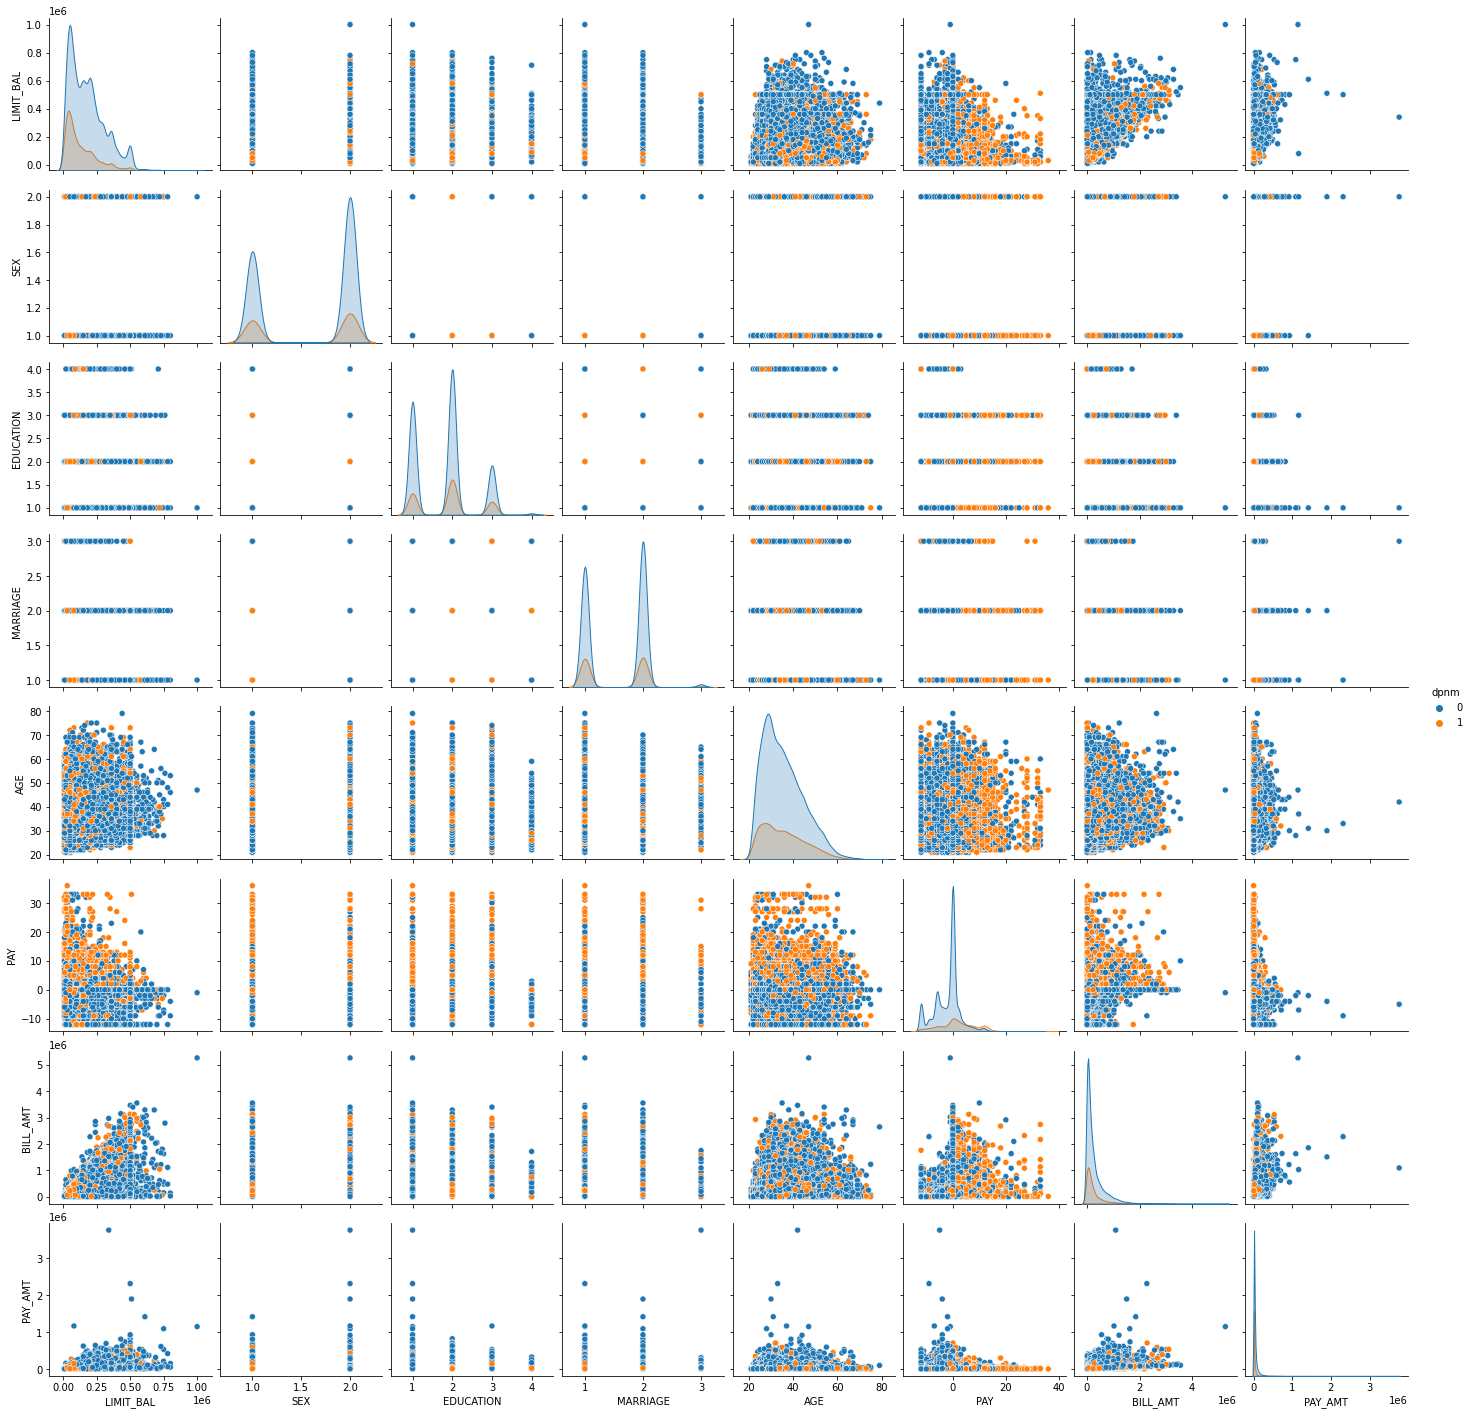

In [29]:
plt.figure(figsize=(42,40))
sns.pairplot(data, hue="dpnm")

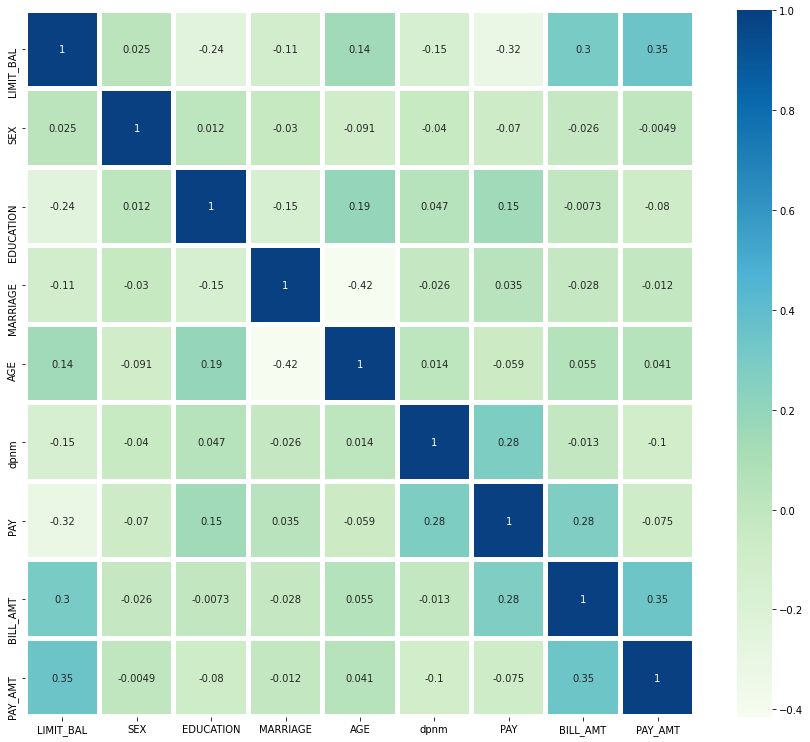

In [30]:
plt.figure(figsize=(15,13))
sns.heatmap(data.corr(),cbar = True,cmap = 'GnBu', annot =True, linewidths=4, linecolor='white')

#### From Fig:
    - PAY_AMIT | LIMIT_BAL = 0.35
    - BILL_AMIT | LIMIT_BAL = 0.3
    - BILL_AMT | PAY_AMT = 0.35
    - PAY | dpnm = 0.28

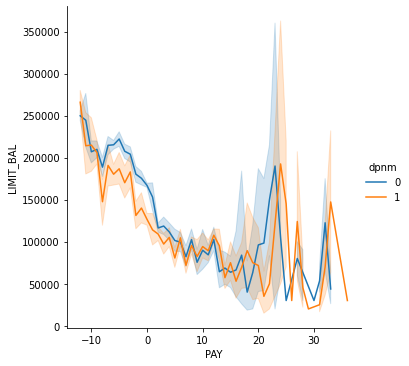

In [31]:
sns.relplot(x = 'PAY', y = 'LIMIT_BAL' ,hue = 'dpnm',kind = 'line', data = data)

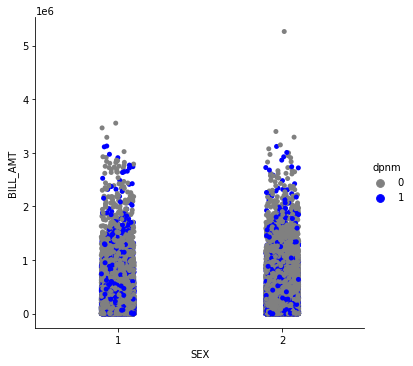

In [32]:
sns.catplot(x = 'SEX', y = 'BILL_AMT' ,hue = 'dpnm', data = data,palette=['Grey','b'])

the above fig. illustrate nature of bill range  

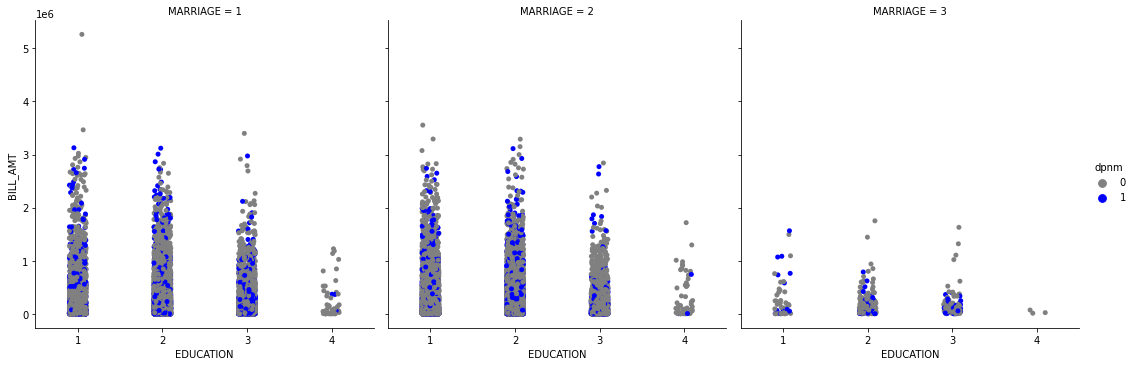

In [33]:
sns.catplot(y='BILL_AMT', x='EDUCATION', hue='dpnm', data = data,col='MARRIAGE', kind='strip',palette=['Grey','b']) 

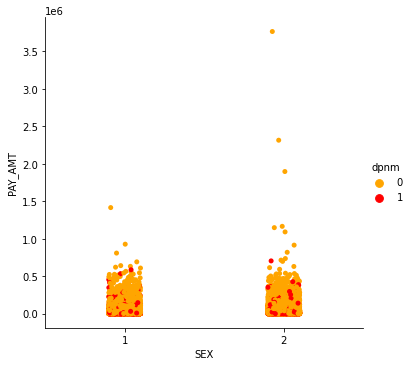

In [34]:
sns.catplot(x = 'SEX', y = 'PAY_AMT' ,hue = 'dpnm', data = data,palette=['Orange','r'])

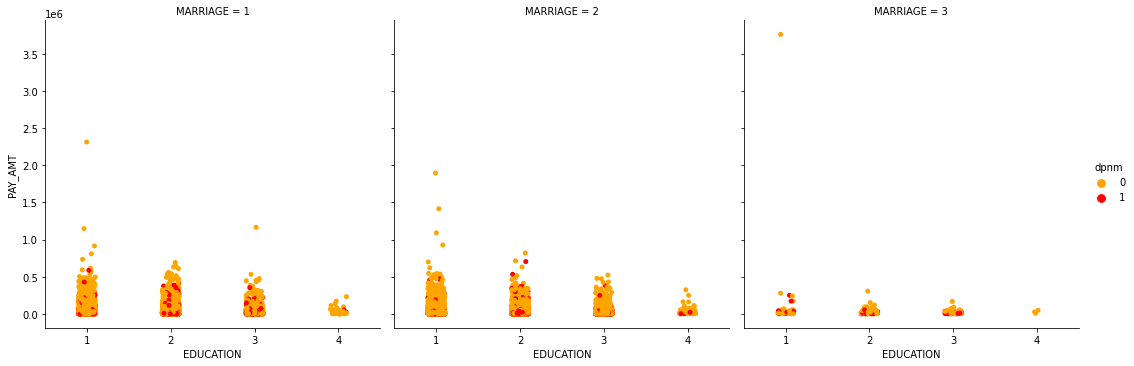

In [35]:
sns.catplot(y='PAY_AMT', x='EDUCATION', hue='dpnm', data = data,col='MARRIAGE', kind='strip',palette=['Orange','Red']) 

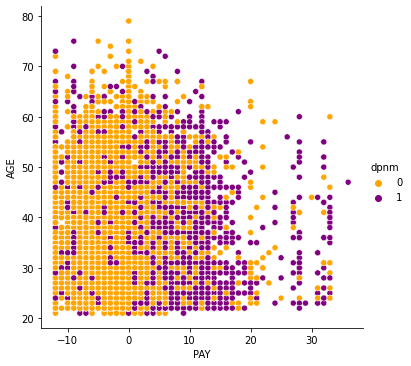

In [36]:
sns.relplot(x = 'PAY', y = 'AGE' ,hue = 'dpnm', data = data,palette=['Orange','Purple'])

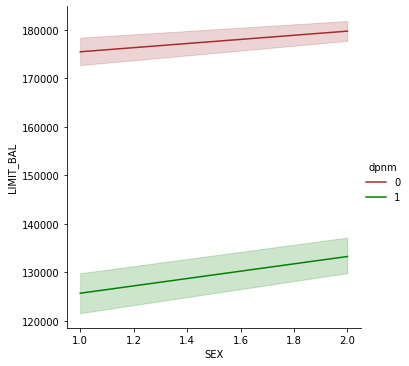

In [37]:
sns.relplot(x = 'SEX', y = 'LIMIT_BAL' ,hue = 'dpnm',kind = 'line', data = data,palette= ['Brown','g'])

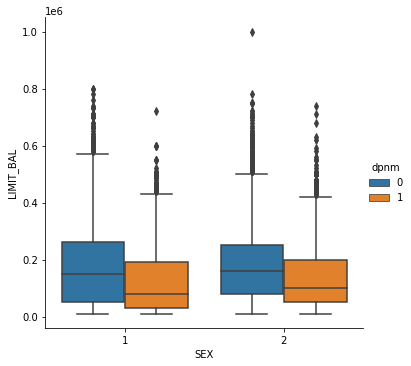

In [38]:
sns.catplot(x = 'SEX', y = 'LIMIT_BAL' ,hue = 'dpnm',kind = 'box', data = data)

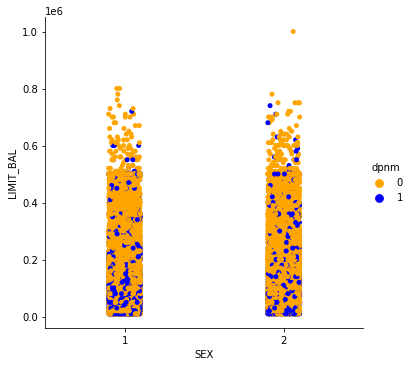

In [39]:
sns.catplot(x = 'SEX', y = 'LIMIT_BAL' ,hue = 'dpnm', data = data,palette= ['Orange','b'])

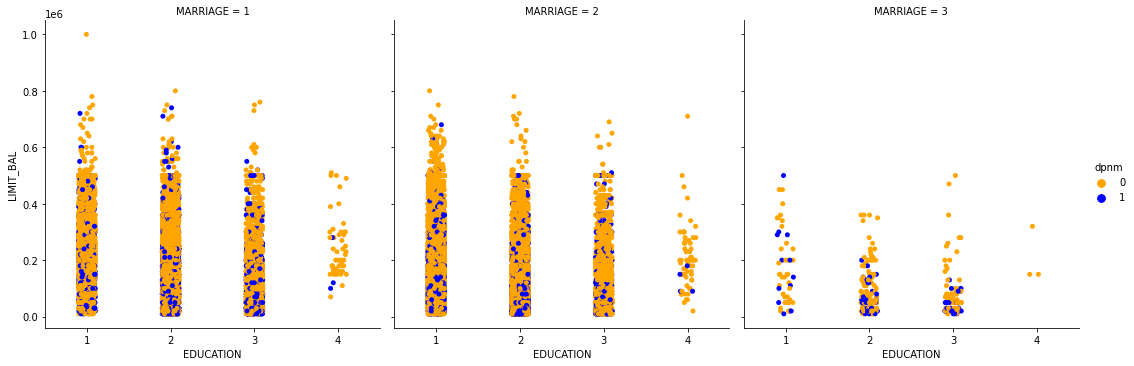

In [40]:
sns.catplot(y='LIMIT_BAL', x='EDUCATION', hue='dpnm', data = data,col='MARRIAGE', kind='strip',palette=['Orange','b']) 

In [41]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'dpnm', 'PAY',
       'BILL_AMT', 'PAY_AMT'],
      dtype='object')

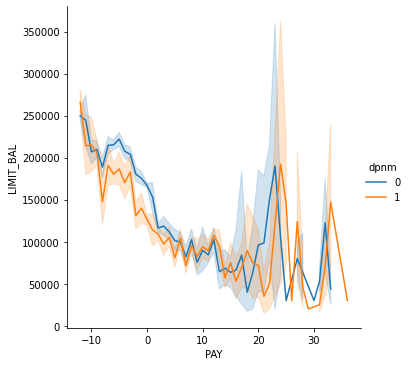

In [42]:
sns.relplot(x = 'PAY', y = 'LIMIT_BAL' ,hue = 'dpnm',kind = 'line', data = data)

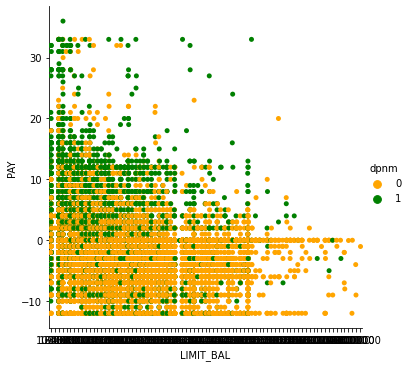

In [43]:
sns.catplot(y='PAY', x='LIMIT_BAL', hue='dpnm', data = data, kind='strip',palette=['Orange','g']) 

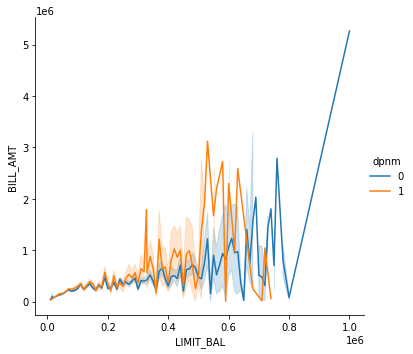

In [44]:
sns.relplot(y = 'BILL_AMT', x = 'LIMIT_BAL' ,hue = 'dpnm',kind = 'line', data = data)

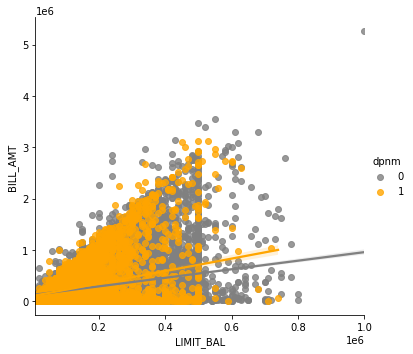

In [45]:
g = sns.lmplot(
    data=data,
    y="BILL_AMT", x="LIMIT_BAL", hue="dpnm",
    height=5,palette= ['Grey','Orange'])

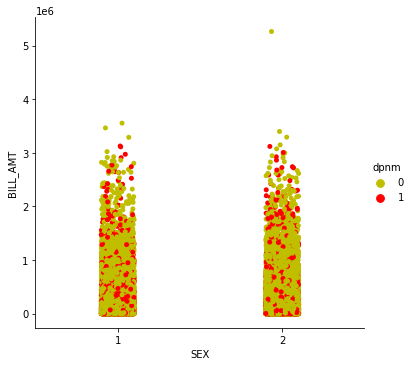

In [46]:
sns.catplot(y='BILL_AMT', x='SEX', hue='dpnm', data = data, kind='strip',palette = ['y','r']) 

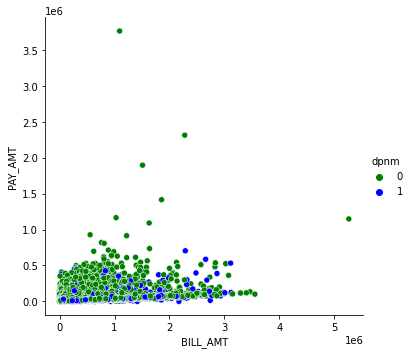

In [47]:
#sns.catplot(x='BILL_AMT', y='PAY_AMT', hue='dpnm', data = data, kind='point') 
sns.relplot(data=data, x="BILL_AMT", y="PAY_AMT", hue="dpnm" ,palette = ['g','b'])


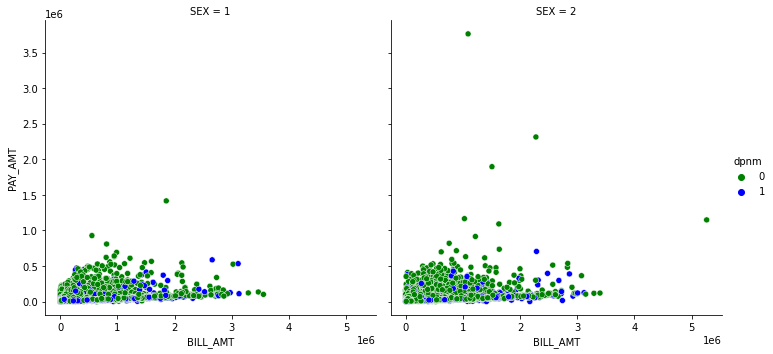

In [48]:
sns.relplot(y='PAY_AMT', x='BILL_AMT', hue='dpnm', data = data,col='SEX',palette=['g','b']) 

<Figure size 3024x2880 with 0 Axes>

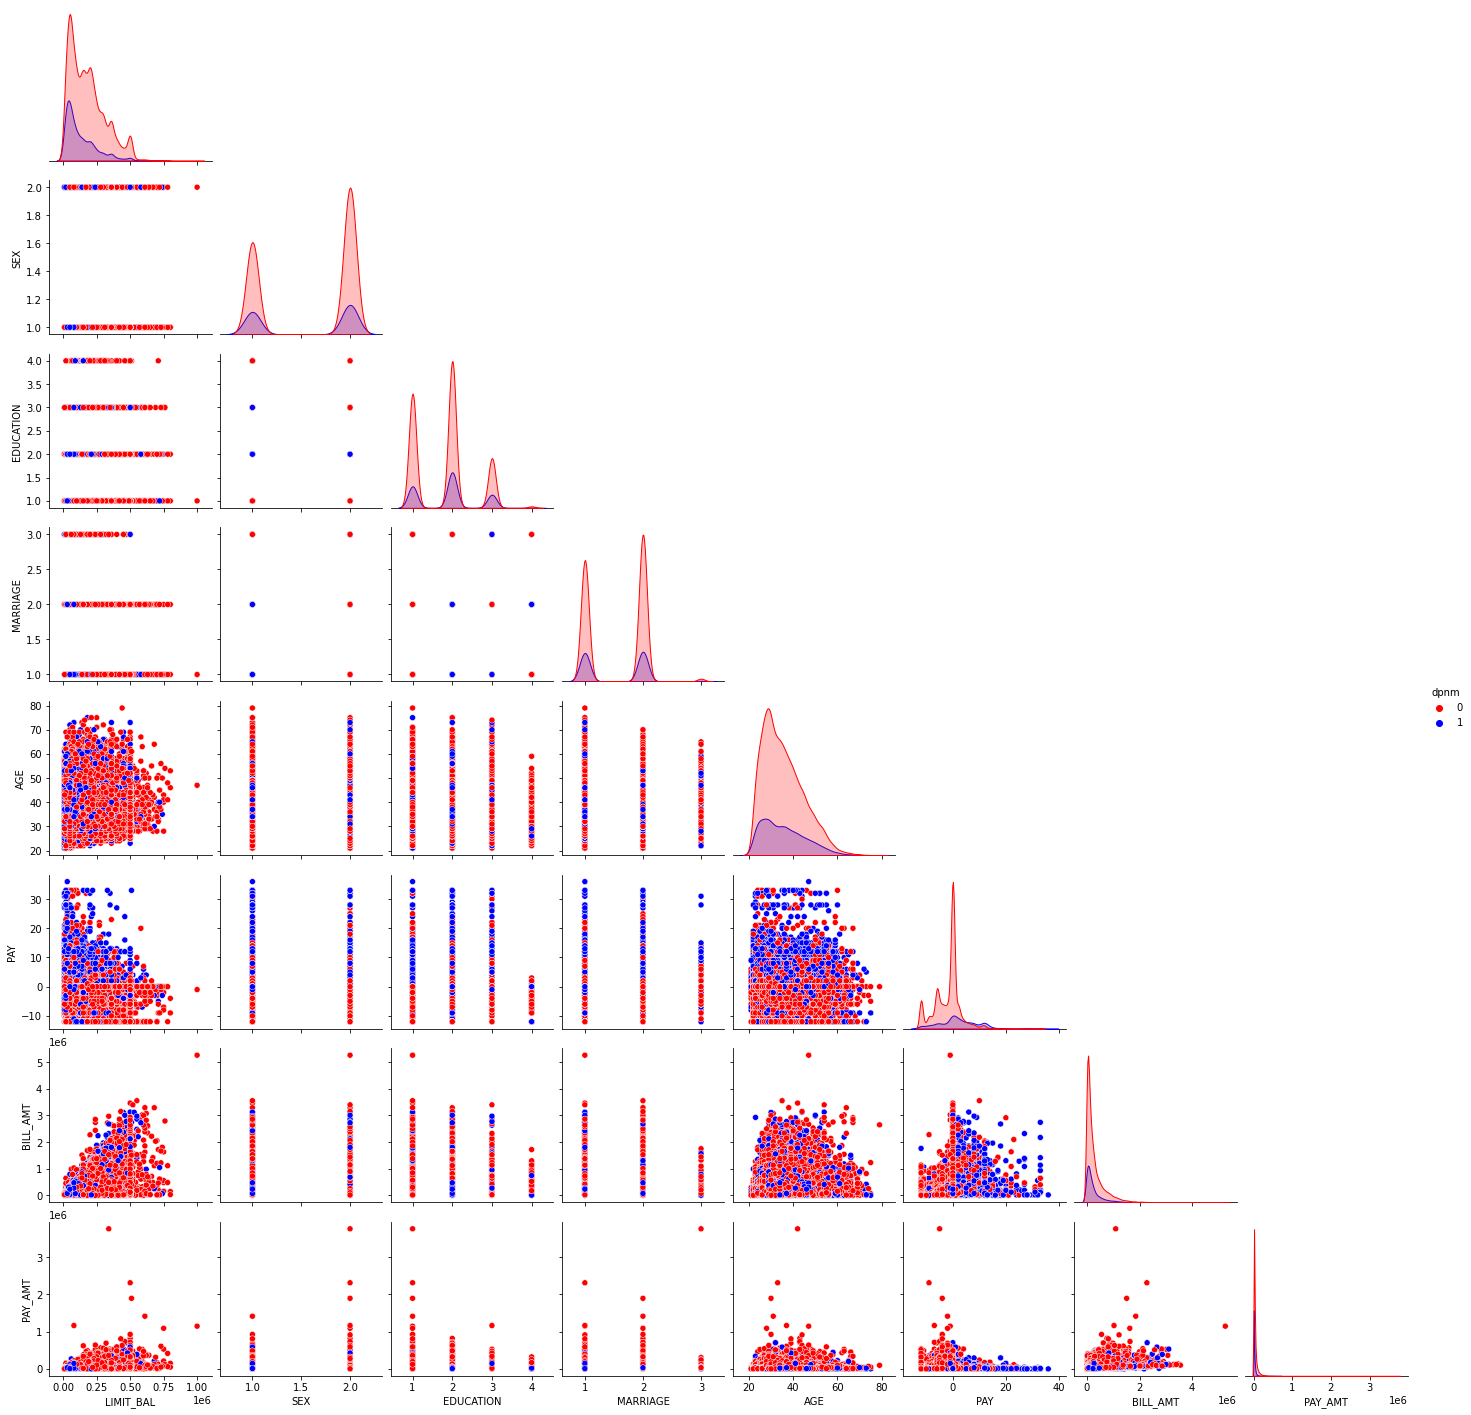

In [49]:
plt.figure(figsize=(42,40))
sns.pairplot(data, hue="dpnm",corner=True,palette=['r','b'])

### Standralize the Data

---



In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [ ]:
#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [50]:
data.LIMIT_BAL = (data.LIMIT_BAL - data.LIMIT_BAL.mean())/data.LIMIT_BAL.std()
data.BILL_AMT = (data.BILL_AMT - data.BILL_AMT.mean())/data.BILL_AMT.std()
data.PAY_AMT = (data.PAY_AMT - data.PAY_AMT.mean())/data.PAY_AMT.std()
data.AGE = (data.AGE - data.AGE.mean())/data.AGE.std()

In [51]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,dpnm,PAY,BILL_AMT,PAY_AMT
0,-1.136293,2,2,1,-1.246092,1,-2,-0.692682,-0.509409
1,-0.365642,2,2,2,-1.029160,1,3,-0.667989,-0.438567
2,-0.596837,2,2,2,-0.161429,0,0,-0.445177,-0.339676
3,-0.905097,2,2,1,0.163970,0,0,-0.103539,-0.382894
4,-0.905097,1,2,1,2.333297,0,-2,-0.424929,0.449599


In [53]:
from sklearn.manifold import TSNE
x = TSNE(learning_rate=50).fit_transform(data)

In [54]:
x[1:4,:]


array([[ 31.149336, -32.785572],
       [-29.32444 ,  19.794134],
       [ 36.40115 ,  16.960121]], dtype=float32)

In [55]:
data['x'] = x[:,0]
data['y'] = x[:,1]

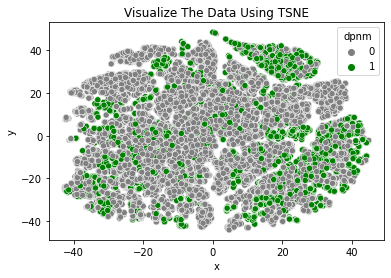

In [58]:
sns.scatterplot(x = 'x', y = 'y',hue = 'dpnm', data=data,palette = ['Gray','g'])
plt.title('Visualize The Data Using TSNE')
plt.show()

In [59]:
data.drop(['x','y'],axis=1, inplace = True)

In [60]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,dpnm,PAY,BILL_AMT,PAY_AMT
0,-1.136293,2,2,1,-1.246092,1,-2,-0.692682,-0.509409
1,-0.365642,2,2,2,-1.029160,1,3,-0.667989,-0.438567
2,-0.596837,2,2,2,-0.161429,0,0,-0.445177,-0.339676
3,-0.905097,2,2,1,0.163970,0,0,-0.103539,-0.382894
4,-0.905097,1,2,1,2.333297,0,-2,-0.424929,0.449599


In [61]:
X = data.drop('dpnm', axis = 1)    
Y = data['dpnm'].values

In [62]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [63]:
x_train.shape

(22473, 8)

In [64]:
y_train.shape

(22473,)

In [65]:
x_test.shape

(7491, 8)

In [66]:
y_test.shape

(7491,)

# Modeling Data:
## Try the Model with Original Data



## **1 - Logistic Regression** : Using Grid Search

In [67]:
logreg=LogisticRegression( random_state=25)
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=25, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
# Hyperparameters to be checked.
parameters = {'C':[0.0001, 0.001, 0.01, 1, 0.1, 10, 100, 1000], 'penalty':['none','l2'] ,
              'solver':['lbfgs','sag','saga','newton-cg']}

# Logistic Regression estimator.
default_logreg=LogisticRegression(random_state=25)

# GridSearchCV estimator.
gs_logreg = GridSearchCV(default_logreg, parameters, cv=10, n_jobs=-1, verbose=1)

# Train the GridSearchCV estimator and search for the best parameters.
gs_logreg.fit(x_train,y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  1.0min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=25, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 1, 0.1, 10, 100, 1000],
                         'penalty': ['none', 'l2'],
                         'solver': ['lbfgs', 'sag', 'saga', 'newton-cg']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [69]:
gs_logreg.score(x_train, y_train)

0.7989587505006007

In [70]:
gs_logreg.score(x_test,y_test)

0.7945534641569884

In [71]:
prediction_lr=gs_logreg.predict(x_test)

In [72]:
print('\n clasification report:\n', classification_report(y_test,prediction_lr))


 clasification report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88      5838
           1       0.66      0.15      0.24      1653

    accuracy                           0.79      7491
   macro avg       0.73      0.56      0.56      7491
weighted avg       0.77      0.79      0.74      7491



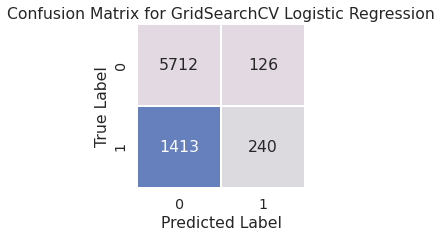

In [73]:
# Make predictions with the best parameters.
gs_log_pred=gs_logreg.predict(x_test)

# Print confusion matrix for Logistic regression.
gs_logreg_matrix = confusion_matrix(y_test,gs_log_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(3, 3))
sns.heatmap(gs_logreg_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for GridSearchCV Logistic Regression');

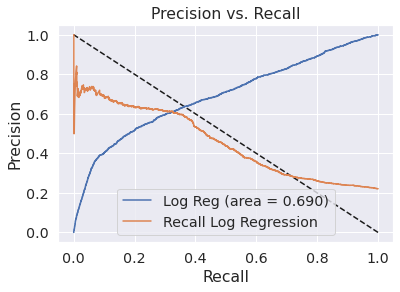

In [112]:
y_pred_prob_en = gs_logreg.predict_proba(x_test)[:,1]
fpr_en, tpr_en, thresholds_en = roc_curve(y_test, y_pred_prob_en)
roc_auc_en = auc(fpr_en, tpr_en)
precision_en, recall_en, th_en = precision_recall_curve(y_test, y_pred_prob_en)
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(fpr_en, tpr_en, label='Log Reg (area = %0.3f)' % roc_auc_en)
plt.plot(recall_en,precision_en , label='Recall Log Regression')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

## **- Logistic Regression** : Withoot using Grid Search

In [77]:
rgr = LogisticRegression()

In [78]:
rgr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
rgr.score(x_train,y_train)

0.7989587505006007

In [80]:
rgr.score(x_test,y_test)

0.7945534641569884

In [81]:
prediction_lr=rgr.predict(x_test)

In [84]:
print('________________________________________________________________________________')
print('\n clasification report:\n', classification_report(y_test,prediction_lr))
print('________________________________________________________________________________')

________________________________________________________________________________

 clasification report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88      5838
           1       0.66      0.15      0.24      1653

    accuracy                           0.79      7491
   macro avg       0.73      0.56      0.56      7491
weighted avg       0.77      0.79      0.74      7491

________________________________________________________________________________


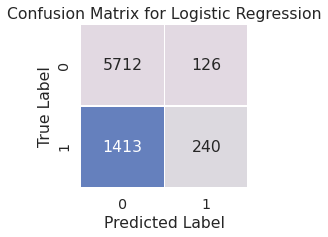

In [82]:
# Print confusion matrix for Logistic regression.
rgr.score_matrix = confusion_matrix(y_test,prediction_lr)
sns.set(font_scale=1.3)
plt.subplots(figsize=(3, 3))
sns.heatmap(rgr.score_matrix ,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Logistic Regression');

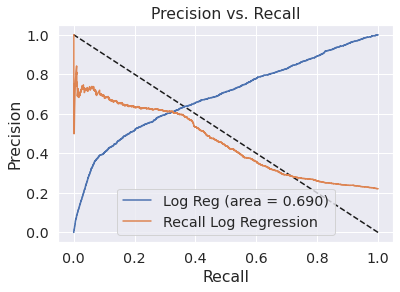

In [113]:
y_pred_prob_en = rgr.predict_proba(x_test)[:,1]
fpr_en, tpr_en, thresholds_en = roc_curve(y_test, y_pred_prob_en)
roc_auc_en = auc(fpr_en, tpr_en)
precision_en, recall_en, th_en = precision_recall_curve(y_test, y_pred_prob_en)
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(fpr_en, tpr_en, label='Log Reg (area = %0.3f)' % roc_auc_en)
plt.plot(recall_en,precision_en , label='Recall Log Regression')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

## From the above Algorithms it's noticed tat the Grif Search produe a better output

---
## **2- Decision tree**: Using Grid Search


In [87]:
# Hyperparameters to be checked.
parameters = {'criterion':['gini','entropy'],
              'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
             }

# MLP estimator.
default_tr = tree.DecisionTreeClassifier(random_state=25)

# GridSearchCV estimator.
gs_tree = GridSearchCV(default_tr, parameters, cv=10, n_jobs=-1,verbose=1)

# Train the GridSearchCV estimator and search for the best parameters.
gs_tree.fit(x_train,y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:    6.2s


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=25,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                      

In [88]:
gs_tree.score(x_train,y_train)

0.8093712454945935

In [89]:
gs_tree.score(x_test,y_test)

0.8041649979975971

In [90]:
prediction_lr=gs_tree.predict(x_test)
print('__________________________________________________________________________')
print('\n clasification report:\n', classification_report(y_test,prediction_lr))
print('__________________________________________________________________________')


 clasification report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88      5838
           1       0.61      0.32      0.42      1653

    accuracy                           0.80      7491
   macro avg       0.72      0.63      0.65      7491
weighted avg       0.78      0.80      0.78      7491



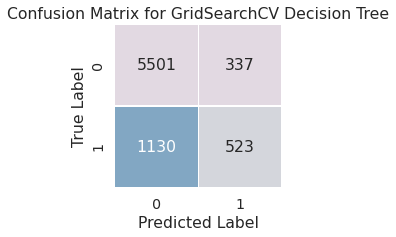

In [91]:
# Make predictions with the best parameters.
gs_log_pred=gs_tree.predict(x_test)

# Print confusion matrix for Logistic regression.
gs_logreg_matrix = confusion_matrix(y_test,gs_log_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(3, 3))
sns.heatmap(gs_logreg_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for GridSearchCV Decision Tree');

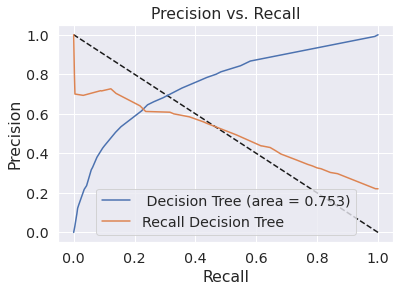

In [114]:
y_pred_prob_en = gs_tree.predict_proba(x_test)[:,1]
fpr_en, tpr_en, thresholds_en = roc_curve(y_test, y_pred_prob_en)
roc_auc_en = auc(fpr_en, tpr_en)
precision_en, recall_en, th_en = precision_recall_curve(y_test, y_pred_prob_en)
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(fpr_en, tpr_en, label=' Decision Tree (area = %0.3f)' % roc_auc_en)
plt.plot(recall_en,precision_en , label='Recall Decision Tree')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

---
## 3- **Random Forest Classifier**: Using GridSearch

In [93]:
rf = RandomForestClassifier(n_estimators=10,max_depth=7,max_features=4)

In [94]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [95]:
rf.score(x_train,y_train)

0.8195167534374583

In [96]:
rf.score(x_test,y_test)

0.8042984915231611

In [97]:
prediction_lr=rf.predict(x_test)
print('____________________________________________________________________________')
print('\n clasification report:\n', classification_report(y_test,prediction_lr))
print('____________________________________________________________________________')

____________________________________________________________________________

 clasification report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88      5838
           1       0.62      0.29      0.39      1653

    accuracy                           0.80      7491
   macro avg       0.72      0.62      0.64      7491
weighted avg       0.78      0.80      0.78      7491

____________________________________________________________________________


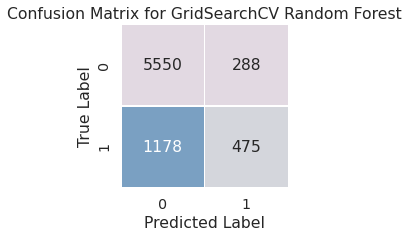

In [98]:
# Make predictions with the best parameters.
gs_log_pred=rf.predict(x_test)

# Print confusion matrix for Logistic regression.
gs_logreg_matrix = confusion_matrix(y_test,gs_log_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(3, 3))
sns.heatmap(gs_logreg_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for GridSearchCV Random Forest');

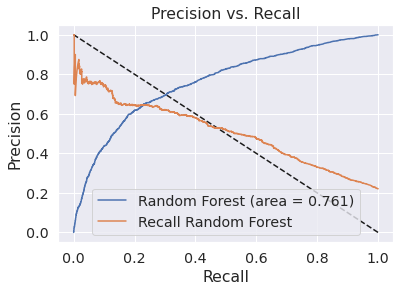

In [115]:
y_pred_prob_en = rf.predict_proba(x_test)[:,1]
fpr_en, tpr_en, thresholds_en = roc_curve(y_test, y_pred_prob_en)
roc_auc_en = auc(fpr_en, tpr_en)
precision_en, recall_en, th_en = precision_recall_curve(y_test, y_pred_prob_en)
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(fpr_en, tpr_en, label='Random Forest (area = %0.3f)' % roc_auc_en)
plt.plot(recall_en,precision_en , label='Recall Random Forest')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

## 4- **GaussianNB**

In [101]:
param_grid={
 'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]}

In [102]:

gnb = GaussianNB()
grid = GridSearchCV(estimator=gnb, param_grid=param_grid)
grid_result = grid.fit(x_train, y_train)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.805100 using {'var_smoothing': 0.01}


In [103]:
grid = GridSearchCV(estimator=gnb, param_grid=param_grid, n_jobs=-1,verbose=1)
grid_result = grid.fit(x_train, y_train)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best: 0.805100 using {'var_smoothing': 0.01}


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.7s finished


In [104]:
gnb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [105]:
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [106]:
gnb.score(x_train,y_train)

0.8029190584256664

In [107]:
gnb.score(x_test,y_test)

0.802696569216393

In [108]:
prediction_lr=gnb.predict(x_test)
print("______________________________________________________________________________")
print('\n clasification report:\n', classification_report(y_test,prediction_lr))
print('______________________________________________________________________________')

______________________________________________________________________________

 clasification report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88      5838
           1       0.60      0.31      0.41      1653

    accuracy                           0.80      7491
   macro avg       0.72      0.63      0.65      7491
weighted avg       0.78      0.80      0.78      7491

______________________________________________________________________________


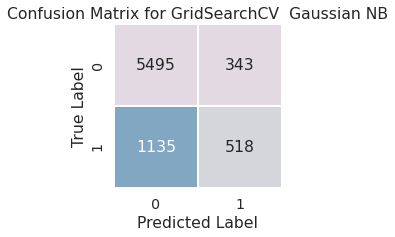

In [109]:
# Make predictions with the best parameters.
gs_log_pred=gnb.predict(x_test)

# Print confusion matrix for Logistic regression.
gs_logreg_matrix = confusion_matrix(y_test,gs_log_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(3, 3))
sns.heatmap(gs_logreg_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for GridSearchCV  Gaussian NB');

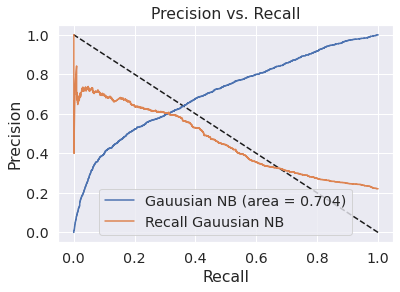

In [111]:
y_pred_prob_en = gnb.predict_proba(x_test)[:,1]
fpr_en, tpr_en, thresholds_en = roc_curve(y_test, y_pred_prob_en)
roc_auc_en = auc(fpr_en, tpr_en)
precision_en, recall_en, th_en = precision_recall_curve(y_test, y_pred_prob_en)
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(fpr_en, tpr_en, label='Gauusian NB (area = %0.3f)' % roc_auc_en)
plt.plot(recall_en,precision_en , label='Recall Gauusian NB')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

----
## 5- **AdaBoost**: Using Grid Search

In [ ]:
#Creating a grid of hyperparametersgrid_params = {'n_estimators': [100,200,300]}Building a 3 fold CV GridSearchCV objectgrid_object = GridSearchCV(estimator = ada_boost, param_grid = grid_params, scoring = 'accuracy', cv = 3, n_jobs = -1)#Fitting the grid to the training datagrid_object.fit(X_train, y_train)#Extracting the best parametersgrid_object.bestparams ...

In [116]:
param_grid={
 'n_estimators': [100,200,300]}

In [117]:
ABC = AdaBoostClassifier()
grid = GridSearchCV(estimator=ABC, param_grid=param_grid, scoring = 'accuracy', cv = 3, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.805455 using {'n_estimators': 100}


In [118]:
ABC.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [119]:
ABC.score(x_train,y_train)

0.80781382102968

In [120]:
ABC.score(x_test,y_test)

0.8044319850487252

In [121]:
prediction_lr=ABC.predict(x_test)
print('____________________________________________________________________________________')
print('\n clasification report:\n', classification_report(y_test,prediction_lr))
print('____________________________________________________________________________')

____________________________________________________________________________________

 clasification report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88      5838
           1       0.61      0.32      0.42      1653

    accuracy                           0.80      7491
   macro avg       0.72      0.63      0.65      7491
weighted avg       0.78      0.80      0.78      7491

____________________________________________________________________________


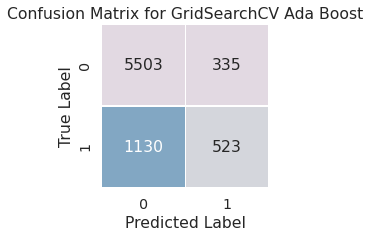

In [122]:
# Make predictions with the best parameters.
gs_log_pred=ABC.predict(x_test)

# Print confusion matrix for Logistic regression.
gs_logreg_matrix = confusion_matrix(y_test,gs_log_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(3, 3))
sns.heatmap(gs_logreg_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for GridSearchCV Ada Boost');

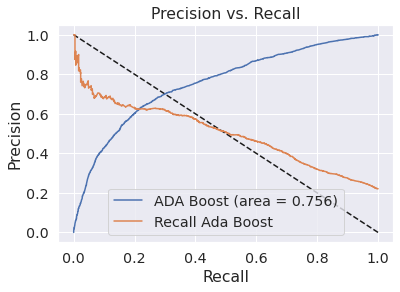

In [124]:
y_pred_prob_en = ABC.predict_proba(x_test)[:,1]
fpr_en, tpr_en, thresholds_en = roc_curve(y_test, y_pred_prob_en)
roc_auc_en = auc(fpr_en, tpr_en)
precision_en, recall_en, th_en = precision_recall_curve(y_test, y_pred_prob_en)
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(fpr_en, tpr_en, label='ADA Boost (area = %0.3f)' % roc_auc_en)
plt.plot(recall_en,precision_en , label='Recall Ada Boost')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

---
## **6- Neural Network**: Using Grid Search

In [125]:
# Hyperparameters to be checked.
parameters = {'activation':['logistic','relu'],
              'solver': ['lbfgs','adam','sgd'],
              'hidden_layer_sizes':[(23),(12,5),(12,5,2),(3,1),(5)]}

# Decision tree estimator.
default_mlp = MLPClassifier(random_state=42)

# GridSearchCV estimator.
gs_mlp = GridSearchCV(default_mlp, parameters, cv=10, n_jobs=-1,verbose=10)

# Train the GridSearchCV estimator and search for the best parameters.
gs_mlp.fit(x_train,y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  7

GridSearchCV(cv=10, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=42, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'a

In [126]:
# Make predictions with the best parameters.
gs_mlp_pred=gs_mlp.predict(x_test)

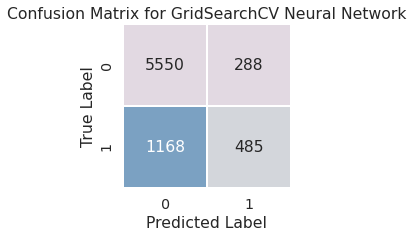

In [127]:
# Plot confusion matrix for GridSearchCV Multi-layer Perceptron.
matrix = confusion_matrix(y_test,gs_mlp_pred)
plt.figure(figsize=(3,3))
sns.heatmap(matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for GridSearchCV Neural Network');

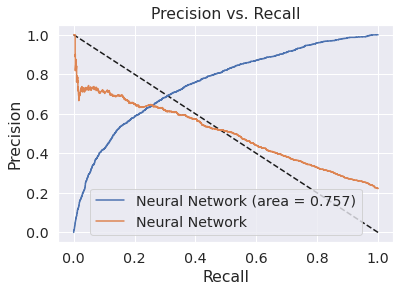

In [129]:
y_pred_prob_en = gs_mlp.predict_proba(x_test)[:,1]
fpr_en, tpr_en, thresholds_en = roc_curve(y_test, y_pred_prob_en)
roc_auc_en = auc(fpr_en, tpr_en)
precision_en, recall_en, th_en = precision_recall_curve(y_test, y_pred_prob_en)
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(fpr_en, tpr_en, label='Neural Network (area = %0.3f)' % roc_auc_en)
plt.plot(recall_en,precision_en , label='Neural Network')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

---
 ## XG Boost: Using Grid Search

In [132]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [133]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [134]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [135]:
grid_search.fit(x_train,y_train)


Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   35.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:  2.8min
[Parallel(n_jobs=10)]: Done 300 out of 300 | elapsed:  4.4min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=42, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=10,
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [23, (12, 5), (12, 5, 2), (3, 1),
                                         

In [136]:
grid_search.score(x_train,y_train)


0.7851111225032499

In [137]:
grid_search.score(x_test,y_test)

0.7641940893745984

In [138]:
prediction_grid_search=grid_search.predict(x_test)
print('________________________________________________________________________________')
print('\n clasification report:\n', classification_report(y_test,prediction_grid_search))
print('________________________________________________________________________________')

________________________________________________________________________________

 clasification report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.88      5838
           1       0.63      0.30      0.41      1653

    accuracy                           0.81      7491
   macro avg       0.73      0.63      0.65      7491
weighted avg       0.78      0.81      0.78      7491

________________________________________________________________________________


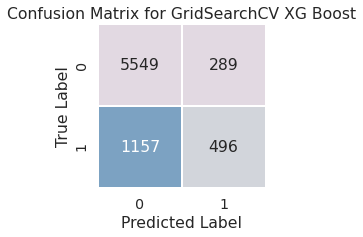

In [139]:
gs_logreg_matrix = confusion_matrix(y_test,prediction_grid_search)
sns.set(font_scale=1.3)
plt.subplots(figsize=(3, 3))
sns.heatmap(gs_logreg_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for GridSearchCV XG Boost');

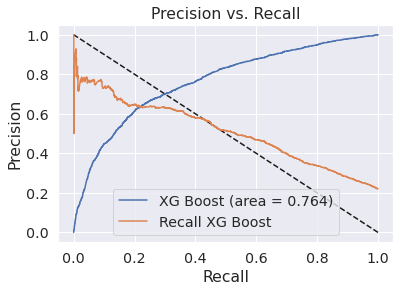

In [140]:
y_pred_prob_en = grid_search.predict_proba(x_test)[:,1]
fpr_en, tpr_en, thresholds_en = roc_curve(y_test, y_pred_prob_en)
roc_auc_en = auc(fpr_en, tpr_en)
precision_en, recall_en, th_en = precision_recall_curve(y_test, y_pred_prob_en)
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(fpr_en, tpr_en, label='XG Boost (area = %0.3f)' % roc_auc_en)
plt.plot(recall_en,precision_en , label='Recall XG Boost')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

----
# Modeling Data:
## Try the Model with Balanced Data

- ### Handle the imblanced Data

In [141]:
smtn = SMOTEENN()

In [142]:
x_smt, y_smt = smtn.fit_resample(X,Y)

### Renew Preprocessing

In [143]:
x_train, x_test, y_train, y_test = train_test_split(x_smt, y_smt, test_size=0.2, random_state=20)

---
## **Logistic Regression**: Using Grid Search


In [144]:
logreg=LogisticRegression( random_state=25)
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=25, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [145]:
# Hyperparameters to be checked.
parameters = {'C':[0.0001, 0.001, 0.01, 1, 0.1, 10, 100, 1000], 'penalty':['none','l2'] ,
              'solver':['lbfgs','sag','saga','newton-cg']}

# Logistic Regression estimator.
default_logreg=LogisticRegression(random_state=25)

# GridSearchCV estimator.
gs_logreg = GridSearchCV(default_logreg, parameters, cv=10, n_jobs=-1, verbose=1)

# Train the GridSearchCV estimator and search for the best parameters.
gs_logreg.fit(x_train,y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  1.5min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=25, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 1, 0.1, 10, 100, 1000],
                         'penalty': ['none', 'l2'],
                         'solver': ['lbfgs', 'sag', 'saga', 'newton-cg']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [146]:
gs_logreg.score(x_train, y_train)

0.7022701730726005

In [147]:
gs_logreg.score(x_test, y_test)

0.6948939230492629

In [148]:
prediction_lr=gs_logreg.predict(x_test)

In [149]:
print('--------------------------------------------------------------------------')
print('\n clasification report:\n', classification_report(y_test,prediction_lr))
print('--------------------------------------------------------------------------')


--------------------------------------------------------------------------

 clasification report:
               precision    recall  f1-score   support

           0       0.67      0.62      0.64      2472
           1       0.71      0.76      0.73      3090

    accuracy                           0.69      5562
   macro avg       0.69      0.69      0.69      5562
weighted avg       0.69      0.69      0.69      5562

--------------------------------------------------------------------------


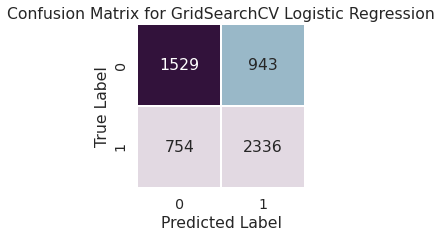

In [150]:
rgr.score_matrix = confusion_matrix(y_test,prediction_lr)
sns.set(font_scale=1.3)
plt.subplots(figsize=(3, 3))
sns.heatmap(rgr.score_matrix ,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for GridSearchCV Logistic Regression');

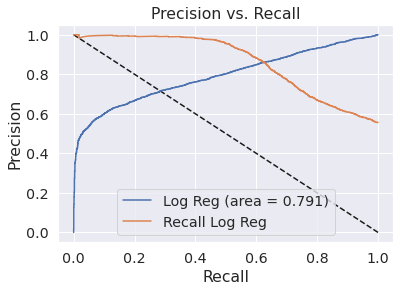

In [152]:
y_pred_prob_en = gs_logreg.predict_proba(x_test)[:,1]
fpr_en, tpr_en, thresholds_en = roc_curve(y_test, y_pred_prob_en)
roc_auc_en = auc(fpr_en, tpr_en)
precision_en, recall_en, th_en = precision_recall_curve(y_test, y_pred_prob_en)
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(fpr_en, tpr_en, label='Log Reg (area = %0.3f)' % roc_auc_en)
plt.plot(recall_en,precision_en , label='Recall Log Reg')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

- ### Without Grid Search

In [153]:
lr = LogisticRegression()

In [154]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [155]:
lr.score(x_train,y_train)

0.7022252191503708

In [156]:
lr.score(x_test,y_test)

0.6948939230492629

In [157]:
prediction_lr=lr.predict(x_test)


In [158]:
print('--------------------------------------------------------------------------')
print('\n clasification report:\n', classification_report(y_test,prediction_lr))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------

 clasification report:
               precision    recall  f1-score   support

           0       0.67      0.62      0.64      2472
           1       0.71      0.76      0.73      3090

    accuracy                           0.69      5562
   macro avg       0.69      0.69      0.69      5562
weighted avg       0.69      0.69      0.69      5562

--------------------------------------------------------------------------


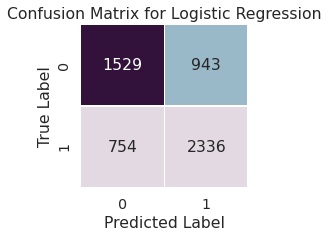

In [159]:
rgr.score_matrix = confusion_matrix(y_test,prediction_lr)
sns.set(font_scale=1.3)
plt.subplots(figsize=(3, 3))
sns.heatmap(rgr.score_matrix ,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Logistic Regression');

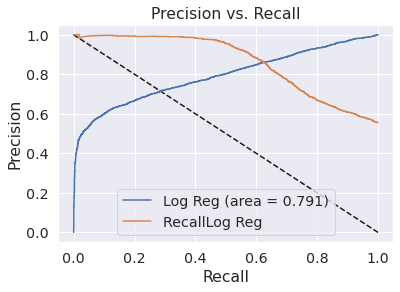

In [160]:
y_pred_prob_en = lr.predict_proba(x_test)[:,1]
fpr_en, tpr_en, thresholds_en = roc_curve(y_test, y_pred_prob_en)
roc_auc_en = auc(fpr_en, tpr_en)
precision_en, recall_en, th_en = precision_recall_curve(y_test, y_pred_prob_en)
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(fpr_en, tpr_en, label='Log Reg (area = %0.3f)' % roc_auc_en)
plt.plot(recall_en,precision_en , label='RecallLog Reg')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

---
## **Decision tree**: Using Grid Search


In [161]:
parameters = {'criterion':['gini','entropy'],
              'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
             }

# MLP estimator.
default_tr = tree.DecisionTreeClassifier(random_state=25)

# GridSearchCV estimator.
gs_tree = GridSearchCV(default_tr, parameters, cv=10, n_jobs=-1,verbose=1)

# Train the GridSearchCV estimator and search for the best parameters.
gs_tree.fit(x_train,y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   30.3s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=25,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                      

In [162]:
gs_tree.score(x_train,y_train)

0.9790964261631827

In [163]:
gs_tree.score(x_test,y_test)

0.8813376483279396

In [164]:
prediction_dr=gs_tree.predict(x_test)
print('__________________________________________________________________________________')
print('\n clasification report:\n', classification_report(y_test,prediction_dr))
print('__________________________________________________________________________________')


__________________________________________________________________________________

 clasification report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87      2472
           1       0.90      0.89      0.89      3090

    accuracy                           0.88      5562
   macro avg       0.88      0.88      0.88      5562
weighted avg       0.88      0.88      0.88      5562

__________________________________________________________________________________


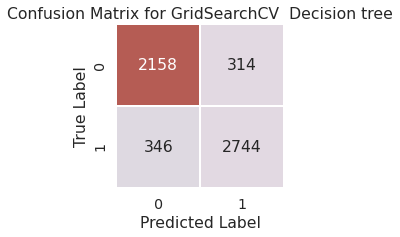

In [165]:
gs_log_pred=gs_tree.predict(x_test)

# Print confusion matrix for Logistic regression.
gs_logreg_matrix = confusion_matrix(y_test,gs_log_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(3, 3))
sns.heatmap(gs_logreg_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for GridSearchCV  Decision tree');

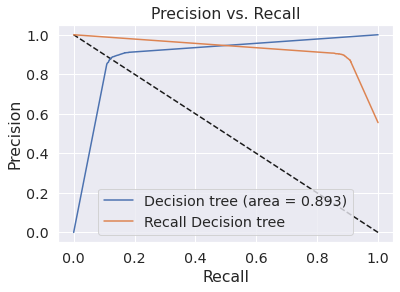

In [166]:
y_pred_prob_en = gs_tree.predict_proba(x_test)[:,1]
fpr_en, tpr_en, thresholds_en = roc_curve(y_test, y_pred_prob_en)
roc_auc_en = auc(fpr_en, tpr_en)
precision_en, recall_en, th_en = precision_recall_curve(y_test, y_pred_prob_en)
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(fpr_en, tpr_en, label='Decision tree (area = %0.3f)' % roc_auc_en)
plt.plot(recall_en,precision_en , label='Recall Decision tree')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

---
- ## **GaussianNB**: Grid Search

In [167]:
param_grid={
 'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]}

In [168]:

gnb = GaussianNB()
grid = GridSearchCV(estimator=gnb, param_grid=param_grid)
grid_result = grid.fit(x_train, y_train)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.690672 using {'var_smoothing': 0.01}


In [169]:
grid = GridSearchCV(estimator=gnb, param_grid=param_grid, n_jobs=-1,verbose=1)
grid_result = grid.fit(x_train, y_train)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best: 0.690672 using {'var_smoothing': 0.01}


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.5s finished


In [170]:
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [171]:
gnb.score(x_train,y_train)

0.6852775904697684

In [172]:
gnb.score(x_test,y_test)

0.6761956130888169

In [173]:
prediction_lr=gnb.predict(x_test)
print('___________________________________________________________________________________')
print('\n clasification report:\n', classification_report(y_test,prediction_lr))
print('___________________________________________________________________________________')

___________________________________________________________________________________

 clasification report:
               precision    recall  f1-score   support

           0       0.71      0.46      0.56      2472
           1       0.66      0.85      0.74      3090

    accuracy                           0.68      5562
   macro avg       0.69      0.65      0.65      5562
weighted avg       0.68      0.68      0.66      5562

___________________________________________________________________________________


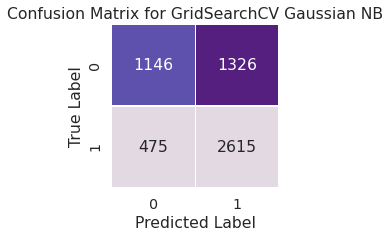

In [174]:

# Print confusion matrix for Logistic regression.
gs_logreg_matrix = confusion_matrix(y_test,prediction_lr)
sns.set(font_scale=1.3)
plt.subplots(figsize=(3, 3))
sns.heatmap(gs_logreg_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for GridSearchCV Gaussian NB');

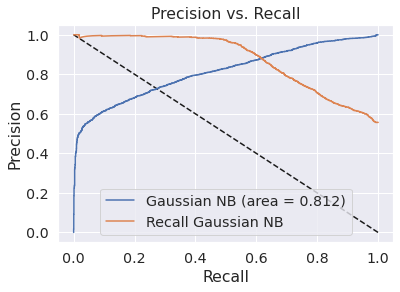

In [175]:
y_pred_prob_en = gnb.predict_proba(x_test)[:,1]
fpr_en, tpr_en, thresholds_en = roc_curve(y_test, y_pred_prob_en)
roc_auc_en = auc(fpr_en, tpr_en)
precision_en, recall_en, th_en = precision_recall_curve(y_test, y_pred_prob_en)
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(fpr_en, tpr_en, label='Gaussian NB (area = %0.3f)' % roc_auc_en)
plt.plot(recall_en,precision_en , label='Recall Gaussian NB')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

---
## **Neural Network**: Using Grid Search

In [176]:
param_grid={
 'max_depth': [10, 20, 30, 40, 50],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [200, 400, 600]}

In [177]:
default_mlp = MLPClassifier(random_state=42)
parameters = {'activation':['logistic','relu'],
              'solver': ['lbfgs','adam','sgd'],
              'hidden_layer_sizes':[(23),(12,5),(12,5,2),(3,1),(5)]}
# GridSearchCV estimator.
gs_mlp = GridSearchCV(default_mlp, parameters, cv=10, n_jobs=-1,verbose=10)

# Train the GridSearchCV estimator and search for the best parameters.
gs_mlp.fit(x_train,y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 11

GridSearchCV(cv=10, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=42, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'a

In [178]:
gs_mlp_pred=gs_mlp.predict(x_test)

In [179]:
default_mlp.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [180]:
default_mlp.score(x_train,y_train)

0.8292650033715442

In [181]:
default_mlp.score(x_test,y_test)

0.8230852211434736

In [182]:
prediction_mlp=default_mlp.predict(x_test)
print('_____________________________________________________________________________')
print('\n clasification report:\n', classification_report(y_test,prediction_mlp))
print('_____________________________________________________________________________')

_____________________________________________________________________________

 clasification report:
               precision    recall  f1-score   support

           0       0.77      0.86      0.81      2472
           1       0.88      0.79      0.83      3090

    accuracy                           0.82      5562
   macro avg       0.82      0.83      0.82      5562
weighted avg       0.83      0.82      0.82      5562

_____________________________________________________________________________


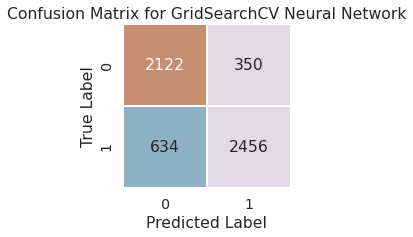

In [183]:
gs_logreg_matrix = confusion_matrix(y_test,prediction_mlp)
sns.set(font_scale=1.3)
plt.subplots(figsize=(3, 3))
sns.heatmap(gs_logreg_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for GridSearchCV Neural Network');

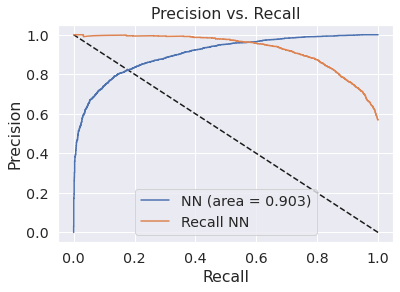

In [184]:
y_pred_prob_en = default_mlp.predict_proba(x_test)[:,1]
fpr_en, tpr_en, thresholds_en = roc_curve(y_test, y_pred_prob_en)
roc_auc_en = auc(fpr_en, tpr_en)
precision_en, recall_en, th_en = precision_recall_curve(y_test, y_pred_prob_en)
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(fpr_en, tpr_en, label='NN (area = %0.3f)' % roc_auc_en)
plt.plot(recall_en,precision_en , label='Recall NN')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

---
- ## **KNN**: Grid Search

In [185]:
from sklearn.neighbors import KNeighborsClassifier
kclf = KNeighborsClassifier(n_neighbors=10)


In [186]:
kclf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [187]:
kclf.score(x_train,y_train)

0.9233985165205664

In [188]:
kclf.score(x_train,y_train)

0.9233985165205664

In [189]:
prediction_lr=kclf.predict(x_test)
print('____________________________________________________________________________________')
print('\n clasification report:\n', classification_report(y_test,prediction_lr))
print('____________________________________________________________________________________')

____________________________________________________________________________________

 clasification report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89      2472
           1       0.90      0.91      0.91      3090

    accuracy                           0.90      5562
   macro avg       0.90      0.90      0.90      5562
weighted avg       0.90      0.90      0.90      5562

____________________________________________________________________________________


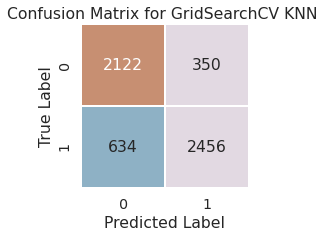

In [190]:
gs_logreg_matrix = confusion_matrix(y_test,prediction_mlp)
sns.set(font_scale=1.3)
plt.subplots(figsize=(3, 3))
sns.heatmap(gs_logreg_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for GridSearchCV KNN ');

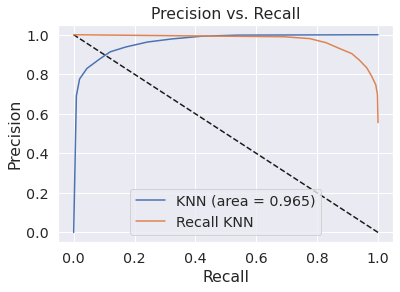

In [191]:
y_pred_prob_en = kclf.predict_proba(x_test)[:,1]
fpr_en, tpr_en, thresholds_en = roc_curve(y_test, y_pred_prob_en)
roc_auc_en = auc(fpr_en, tpr_en)
precision_en, recall_en, th_en = precision_recall_curve(y_test, y_pred_prob_en)
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(fpr_en, tpr_en, label='KNN (area = %0.3f)' % roc_auc_en)
plt.plot(recall_en,precision_en , label='Recall KNN')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

---
- ## **AdaBoost**: using grid search

In [192]:
param_grid={
 'n_estimators': [100,200,300]}

In [193]:
ABC = AdaBoostClassifier()
grid = GridSearchCV(estimator=ABC, param_grid=param_grid, scoring = 'accuracy', cv = 3, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.846437 using {'n_estimators': 300}


In [194]:
ABC.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [195]:
ABC.score(x_train,y_train)

0.816228365924927

In [196]:
ABC.score(x_test,y_test)

0.8124775260697591

In [197]:
prediction_ABC=ABC.predict(x_test)
print('________________________________________________________________________________')
print('\n clasification report:\n', classification_report(y_test,prediction_ABC))
print('________________________________________________________________________________')

________________________________________________________________________________

 clasification report:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80      2472
           1       0.87      0.78      0.82      3090

    accuracy                           0.81      5562
   macro avg       0.81      0.82      0.81      5562
weighted avg       0.82      0.81      0.81      5562

________________________________________________________________________________


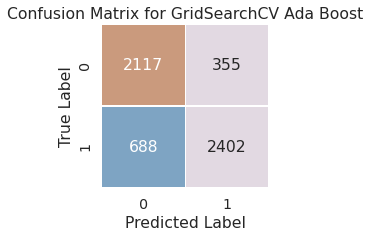

In [198]:
gs_logreg_matrix = confusion_matrix(y_test,prediction_ABC)
sns.set(font_scale=1.3)
plt.subplots(figsize=(3, 3))
sns.heatmap(gs_logreg_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for GridSearchCV Ada Boost');

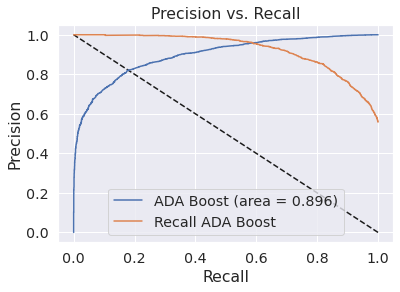

In [200]:
y_pred_prob_en = ABC.predict_proba(x_test)[:,1]
fpr_en, tpr_en, thresholds_en = roc_curve(y_test, y_pred_prob_en)
roc_auc_en = auc(fpr_en, tpr_en)
precision_en, recall_en, th_en = precision_recall_curve(y_test, y_pred_prob_en)
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(fpr_en, tpr_en, label='ADA Boost (area = %0.3f)' % roc_auc_en)
plt.plot(recall_en,precision_en , label='Recall ADA Boost')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

---
- ## **Random Forest**: Using Grid Search

In [201]:
rfc=RandomForestClassifier(random_state=42)


In [202]:
param_grid = { 
    'n_estimators': [200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6],
    'criterion' :['gini', 'entropy']
}

In [203]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [204]:
CV_rfc.best_params_


{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 200}

In [205]:
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [206]:
CV_rfc.score(x_train,y_train)

0.8306585749606653

In [207]:
CV_rfc.score(x_train,y_train)

0.8306585749606653

In [208]:
prediction_CV_rfc=CV_rfc.predict(x_test)
print('________________________________________________________________________________')
print('\n clasification report:\n', classification_report(y_test,prediction_CV_rfc))
print('________________________________________________________________________________')

________________________________________________________________________________

 clasification report:
               precision    recall  f1-score   support

           0       0.76      0.87      0.81      2472
           1       0.88      0.78      0.83      3090

    accuracy                           0.82      5562
   macro avg       0.82      0.83      0.82      5562
weighted avg       0.83      0.82      0.82      5562

________________________________________________________________________________


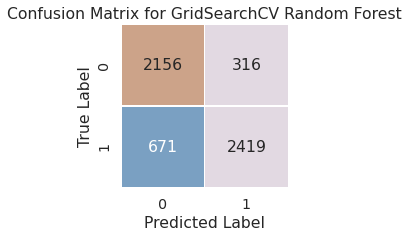

In [209]:
gs_logreg_matrix = confusion_matrix(y_test,prediction_CV_rfc)
sns.set(font_scale=1.3)
plt.subplots(figsize=(3, 3))
sns.heatmap(gs_logreg_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for GridSearchCV Random Forest');

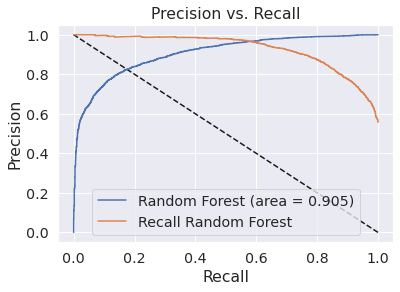

In [210]:
y_pred_prob_en = CV_rfc.predict_proba(x_test)[:,1]
fpr_en, tpr_en, thresholds_en = roc_curve(y_test, y_pred_prob_en)
roc_auc_en = auc(fpr_en, tpr_en)
precision_en, recall_en, th_en = precision_recall_curve(y_test, y_pred_prob_en)
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(fpr_en, tpr_en, label='Random Forest (area = %0.3f)' % roc_auc_en)
plt.plot(recall_en,precision_en , label='Recall Random Forest')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

---
- ## **XG BOOST**: GRIDSEARCH

In [211]:
parameters = {
    'max_depth': range (2, 7, 1),
    'n_estimators': range(60, 240, 60),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [212]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [213]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [214]:

grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 45 candidates, totalling 450 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   30.2s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:  3.9min
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:  9.9min
[Parallel(n_jobs=10)]: Done 450 out of 450 | elapsed: 10.7min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=42, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 7),
                         'n_estimators': range(60, 240, 60)},
         

In [215]:
grid_search.score(x_train,y_train)

0.9876247245786051

In [216]:
grid_search.score(x_test,y_test)

0.9717382254061017

In [217]:
prediction_grid_search=grid_search.predict(x_test)
print('________________________________________________________________________________')
print('\n clasification report:\n', classification_report(y_test,prediction_grid_search))
print('________________________________________________________________________________')

________________________________________________________________________________

 clasification report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      2472
           1       0.95      0.90      0.93      3090

    accuracy                           0.92      5562
   macro avg       0.92      0.92      0.92      5562
weighted avg       0.92      0.92      0.92      5562

________________________________________________________________________________


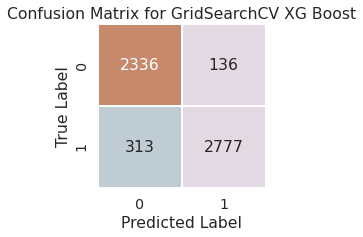

In [218]:
gs_logreg_matrix = confusion_matrix(y_test,prediction_grid_search)
sns.set(font_scale=1.3)
plt.subplots(figsize=(3, 3))
sns.heatmap(gs_logreg_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for GridSearchCV XG Boost');

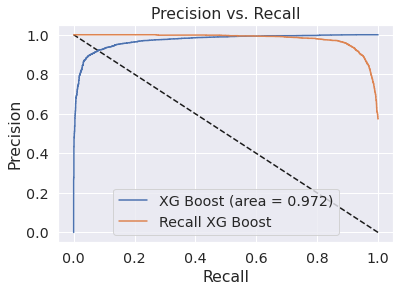

In [219]:
y_pred_prob_en = grid_search.predict_proba(x_test)[:,1]
fpr_en, tpr_en, thresholds_en = roc_curve(y_test, y_pred_prob_en)
roc_auc_en = auc(fpr_en, tpr_en)
precision_en, recall_en, th_en = precision_recall_curve(y_test, y_pred_prob_en)
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(fpr_en, tpr_en, label='XG Boost (area = %0.3f)' % roc_auc_en)
plt.plot(recall_en,precision_en , label='Recall XG Boost')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()